# DiffEdit

> A notebook for understanding and experimenting with the paper [DiffEdit: Diffusion-based semantic image editing with mask guidance](https://arxiv.org/abs/2210.11427)

# How to read a paper

Accoding to [Andrew Ng](https://www.youtube.com/watch?v=733m6qBH-jI&t=460s), You should not read a paper from start to finish, but do it in several passes, focusing on the parts that will give you an idea of what the paper is about.

1. Title, Abstract, Figures
2. Intro, Conclusion, Figures again, Skim the rest

In this notebook, we will try to get an overview of the paper: [DiffEdit: Diffusion-based semantic image editing with mask guidance](https://arxiv.org/abs/2210.11427)


#  First pass

## Title: <u>DiffEdit: Diffusion-based <mark>semantic</mark> image editing with <mark>mask guidance</mark></u>



So this paper is about something `semantic`, i.e. it is based on text. And then we edit images based on a `mask` to guide it.

**Semantic**

> Relating to meaning in language or logic.





**Mask**

> An image that acts as a cookie cutter, with instructions on what to keep and what to remove.

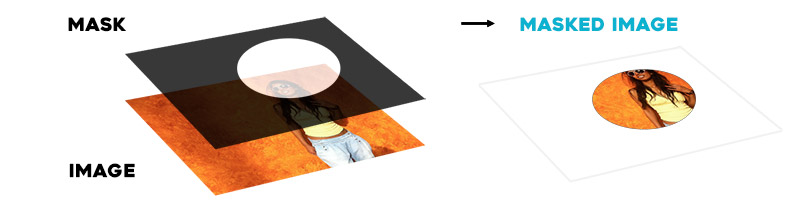

Source: [Shmu Perhiniak, yesimadesigner.com](https://yesimadesigner.com/our-ultimate-guide-to-masking-photoshop-cc-2019/)

## Abstract

Image generation has recently seen tremendous advances, with diffusion models allowing to synthesize convincing images for a large variety of text prompts. In this article, we propose <mark>DiffEdit, a method to take advantage of text-conditioned diffusion models for the task of semantic image editing, where the goal is to edit an image based on a text query.</mark> Semantic image editing is an <u>extension of image generation, with the additional constraint that the generated image should be as similar as possible to a given input image</u>. Current editing methods based on diffusion models usually require to provide a mask, making the task much easier by treating it as a conditional inpainting task. In contrast, <mark>our main contribution is able to automatically generate a mask</mark> highlighting regions of the input image that need to be edited, by contrasting predictions of a diffusion model conditioned on different text prompts. Moreover, we rely on latent inference to preserve content in those regions of interest and show excellent synergies with mask-based diffusion. DiffEdit achieves state-of-the-art editing performance on ImageNet. In addition, we evaluate semantic image editing in more challenging settings, using images from the COCO dataset as well as text-based generated images.

## Figure 1

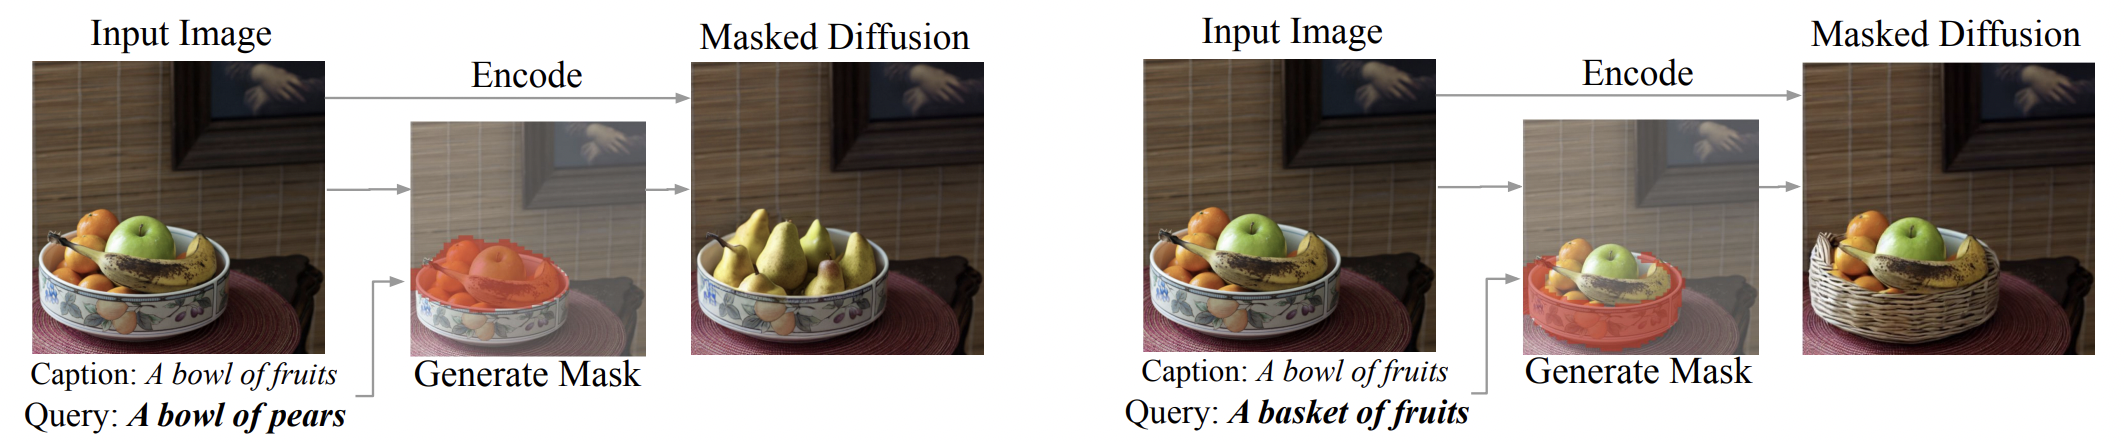

In semantic image editing the goal is to <mark>modify an input image based on a textual query</mark>,
while otherwise <mark>leaving the image as close as possible to the original</mark>. In our DIFFEDIT approach, <u>a
mask generation module determines which part of the image should be edited</u>, and an encoder infers
the latents, to provide inputs to a text-conditional diffusion model which produces the image edit.

# Second Pass

## Intro

The task of <mark>semantic image editing consists in modifying an input image in accordance with a
textual transformation query</mark>. For instance, given an image of a bowl of fruits and the query “fruits”
→ “pears”, <mark>the aim is to produce a novel image where the fruits have been changed into pears</mark>,
<u>while keeping the bowl and the background as similar as possible to the input image.</u>

The text query
can also be a more elaborate description like “A basket of fruits”. See the example edits obtained
with DIFFEDIT in Figure 1.

Semantic image editing bears strong similarities with image generation and can be viewed as extending text-conditional image generation with an additional constraint: <mark>the
generated image should be as close as possible to a given input image.</mark>

### Problem - Existing approaces makes you loose data
(I added this subheading, also you can skip this)

Text-conditional image generation is currently undergoing a revolution, with DALL-E (Ramesh
et al., 2021), Cogview (Ding et al., 2021), Make-a-scene (Gafni et al., 2022), Latent Diffusion Models (Rombach et al., 2022), DALL-E 2 (Ramesh et al., 2022) and Imagen (Saharia et al., 2022b),vastly improving state of the art in modelling wide distributions of images and allowing for unprecedented compositionality of concepts in image generation. Scaling these models is a key to
their success. State-of-the art models are now trained on vast amounts of data, which requires large
computational resources. Similarly to language models pretrained on web-scale data and adapted
in downstreams tasks with prompt engineering, the generative power of these big generative models can be harnessed to solve semantic image editing, avoiding to train specialized architectures (Li
et al., 2020a; Wang et al., 2022a), or to use costly instance-based optimization (Crowson et al., 2022;
Couairon et al., 2022; Patashnik et al., 2021).
Diffusion models are an especially interesting class of model for image editing because of their iterative denoising process starting from random Gaussian noise. This process can be guided through
a variety of techniques, like CLIP guidance (Nichol et al., 2021; Avrahami et al., 2022; Crowson,
2021), and inpainting by copy-pasting pixel values outside a user-given mask (Lugmayr et al., 2022). <mark>These previous works, however, lack two crucial properties for semantic image editing:</mark> (i) **inpainting discards information** about the input image that should be used in image editing (e.g. changing
a dog into a cat should not modify the animal’s color and pose); (ii) **a mask must be provided** as
input to <u>tell the diffusion model what parts of the image should be edited</u>.

We believe that while
drawing masks is common on image editing tools like Photoshop, language-guided editing offers a
more intuitive interface to modify images that requires less effort from users.
Conditioning a diffusion model on an input image <em>**can also be done without a mask**</em>, e.g. by considering the **distance to input image as a loss function** (Crowson, 2021; Choi et al., 2021), or by **using
a noised version of the input image as a starting point** for the denoising process as in SDEdit (Meng
et al., 2021). <mark>However, these editing methods tend to modify the entire image, whereas we aim for
localized edits.</mark> Furthermore, **adding noise** to the input image **discards important information**, both
inside the region that should be edited and outside.

### Solution - Automatically paint what region needs to change and only change that
(I added this subheading)

To leverage the best of both worlds, we propose <mark>DIFFEDIT, an algorithm that automatically finds
what regions of an input image should be edited given a text query.</mark> 

> **By <u>contrasting</u> the <em>predictions</em>
of a <u>conditional</u> and <u>unconditional</u> diffusion model**, we are able to <mark>locate where editing is needed</mark>
to match the text query.

We also show how using a <mark>reference text describing the input image</mark> **and similar to the query**, can help obtain **better masks**. Moreover, we demonstrate that using a <mark><u>reverse
denoising model</u>, to <u>encode</u> the input image in latent space,</mark> rather than simply adding noise to it,
allows to <mark>better integrate the edited region into the background</mark> and produces more subtle and natural
edits. See Figure 1 for illustrations.

We quantitatively evaluate our approach and compare to prior
work using images of the ImageNet and COCO dataset, as well as a set of generated images.

## Conclusion

We introduced DIFFEDIT, a novel algorithm for semantic image editing based on diffusion models.
<mark>Given a textual query, using the diffusion model, DIFFEDIT infers the relevant regions to be edited
rather than requiring a user generated mask.</mark> Furthermore, in contrast to other diffusion-based methods, we initialize the generation process with a <mark>DDIM encoding of the input</mark>.We provide theoretical
analysis that motivates this choice, and show experimentally that <mark>this approach conserves more appearance information from the input image, leading to lighter edits.</mark> Quantitative and qualitative
evaluations on ImageNet, COCO, and images generated by Imagen, show that our approach leads
excellent edits, improving over previous approaches.

## Figures againg
### Figure 2

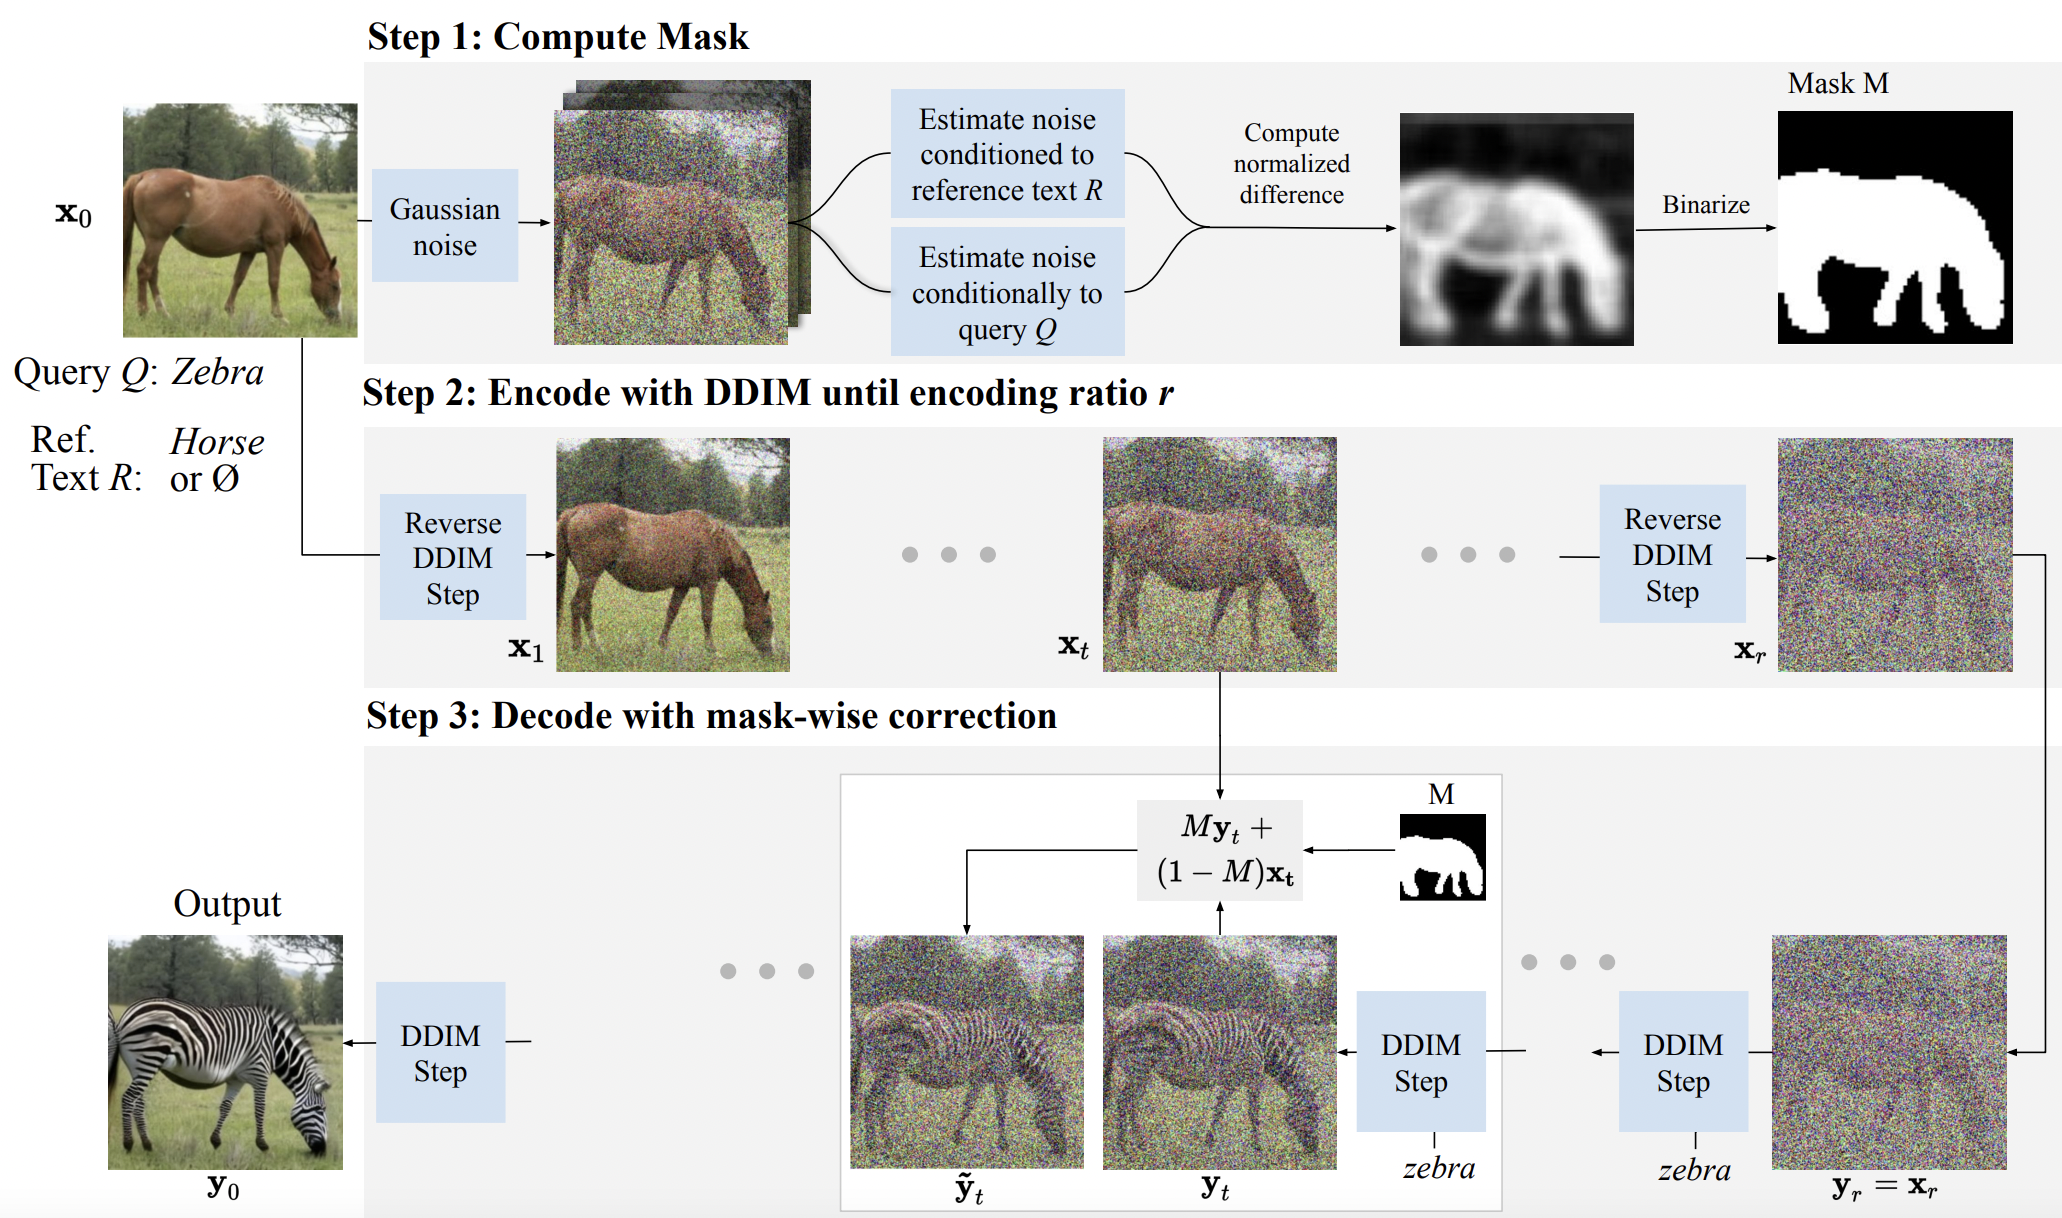

Figure 2: The three steps of DIFFEDIT. 

Step 1: we add noise to the input image, and denoise it:
once conditioned on the query text, and once conditioned on a reference text (or unconditionally).
<mark>We derive a mask based on the difference in the denoising results</mark>. 

Step 2: we <mark>encode</mark> the input
image with <mark>DDIM</mark>, <u>**to estimate the latents** corresponding to the input image</u>. 

Step 3: we perform
<mark>DDIM decoding</mark> <u>conditioned on the text query</u>, **using the inferred mask to replace the background**
with pixel values coming from the encoding process at the corresponding timestep.

### Figure 5

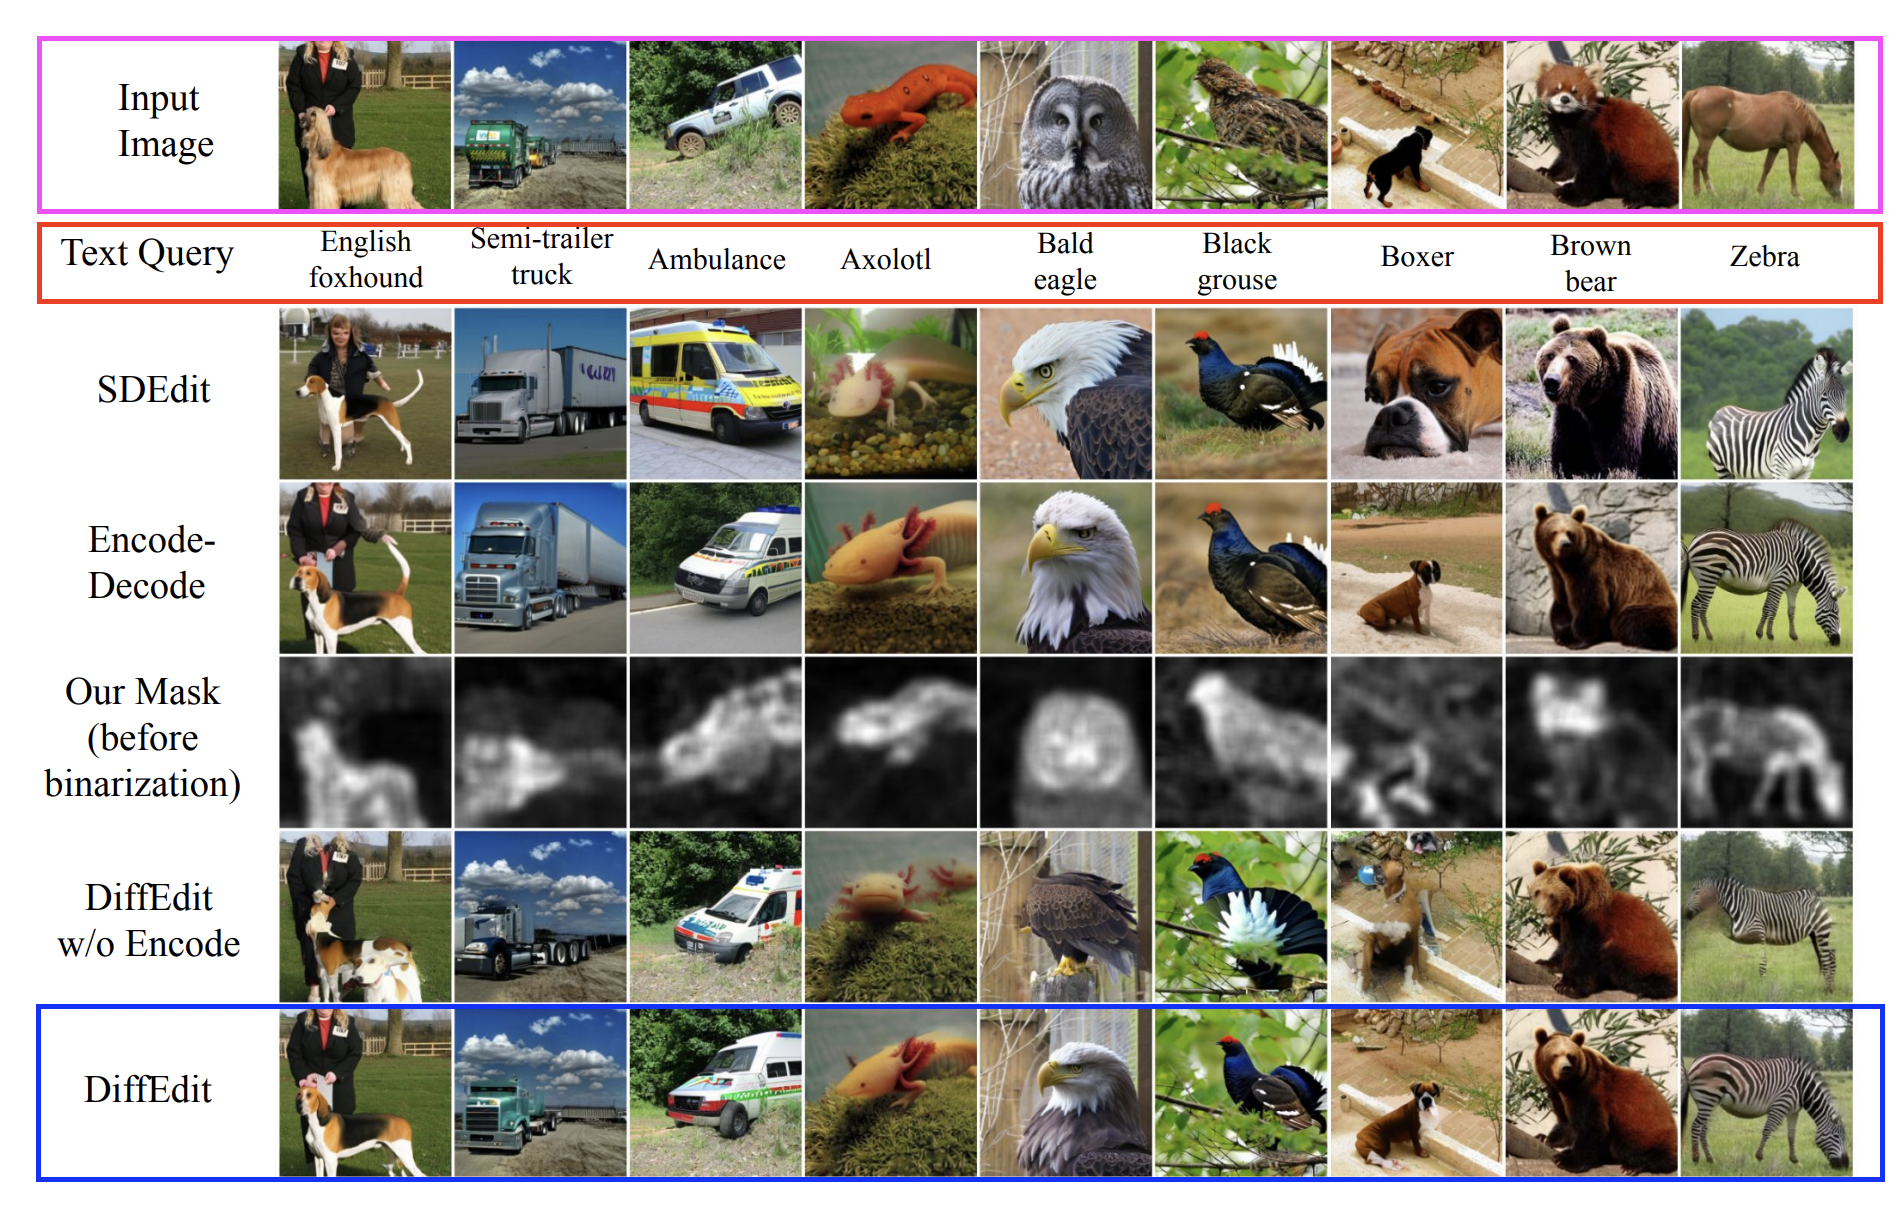

Figure 5: Edits obtained on ImageNet with DIFFEDIT and ablated models. 

Encode-Decode is
DIFFEDIT without masking, and 

SDEdit is obtained when not using masking nor encoding. 

When
not using masking (SDEdit and Encode-Decode) we observe undesired edits to the background,
see e.g. the sky in the second column. When not using DDIM encoding (SDEdit and DiffEdit w/o
Encode), appearance information from the input —such as pose— is lost, see last two columns.

## Skim the rest
[Here you go](https://arxiv.org/pdf/2210.11427.pdf)

## Code

## 3.2 SEMANTIC IMAGE EDITING WITH DIFFEDIT
In many cases, semantic image edits can be restricted to only a part of the image, leaving other parts
unchanged. However, the input text query does not explicitly identify this region, and a naive method
could allow for edits all over the image, risking to modify the input in areas where it is not needed.
To circumvent this, <mark>we propose DIFFEDIT, a method to leverage a text-conditioned diffusion model
to infer a mask of the region that needs to be edited.</mark> Starting from a **DDIM encoding of the input
image**, DIFFEDIT uses the **inferred mask** to guide the **denoising** process, minimizing edits outside
the region of interest. Figure 2 illustrates the three steps of our approach, which we detail below.

## Step 1: Computing editing mask.
When the denoising an image, a text-conditioned diffusion
model will yield different noise estimates given different text conditionings. <mark>We can consider where
the estimates are different, which gives information about what image regions are concerned by
the change in conditioning text.</mark> For instance, in Figure 2, the noise estimates conditioned to the
query <mark>zebra and reference text horse
are different on the body of the animal</mark>, where they will tend
to decode different colors and textures depending on the conditioning. For the background, on the
other hand, there is little change in the noise estimates.

The difference between the noise estimates
can thus be used to infer a mask that identifies what parts on the image need to be changed to
match the query.

> In our algorithm, we use a <mark>Gaussian noise with strength 50%</mark> (see analysis in
Appendix A.1), <mark>remove extreme values in noise predictions</mark> and stabilize the effect by <mark>averaging
spatial differences over a set of n input noises</mark>, with `n= 10` in our default configuration. The result is
then <mark>rescaled to the `range [0, 1]`</mark>, and <mark>binarized with a threshold</mark>, which we set to `0.5` by default.

The
masks generally somewhat overshoot the region that requires editing, this is beneficial as it allows it
to be smoothly embedded in it’s context, see examples in Section 4 and Section A.5.

## Step 2: Encoding.
We encode the input image x0 in the implicit latent space at timestep r with
the DDIM encoding function Er. This is done with the unconditional model, i.e. using conditioning
text ∅, so no text input is used for this step.
1We can also use an empty reference text, which we denote as Q = ∅.
4
Preprint. Under review.

## Step 3: Decoding with mask guidance.
After obtaining the latent xr, we decode it with our diffusion model conditioned on the editing text query Q, e.g. zebra in the example of Figure 2. We use our
mask M to guide this diffusion process. Outside the mask M, the edited image should in principle
be the same as the input image. We guide the diffusion model by replacing pixel values outside the
mask with the latents xt inferred with DDIM encoding, which will naturally map back to the original
pixels through decoding, unlike when using a noised version of x0 as typically done (Meng et al.,
2021; Song et al., 2021). The mask-guided DDIM update can be written as ˜yt = Myt + (1−M)xt,
where yt is computed from yt−dt with Eq. 2, and xt is the corresponding DDIM encoded latent.
The encoding ratio r determines the strength of the edit: larger values of r allow for stronger edits
that allow to better match the text query, at the cost of more deviation from the input image which
might not be needed. We evaluate the impact of this parameter in our experiments. We illustrate the
effect of the encoding ratio in Appendix A.5